In [2]:
import numpy as np
from matplotlib import pyplot as plt
import ants

In [3]:
cd ../Data/Genemaps

/mmfs1/data/pijarj/BC-ORG-Data/Data/Genemaps


/data/pijarj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



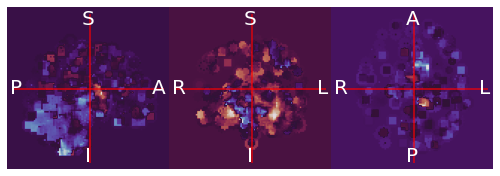

-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.014154168013671696
-0.0141541

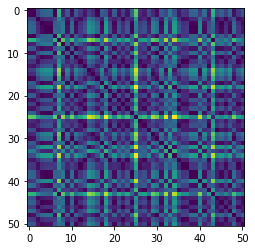

In [30]:
#correlation between diffmat of subject and gene
diffmats = np.load('../../Data/Genemaps/CVAE_diffmats_S661.npy')
subject_diffmat = diffmats[0,:,:]
atlas = ants.image_read('../../YeoAtlas/Atlas_parc-7n_2mm.nii')
gene_im = ants.image_read('../../Data/Genemaps/gene_22585_NLGN4Y_22829.0.nii.gz')
gene_im.plot_ortho(flat=True,cmap='twilight')
gene_flat = gene_im.numpy().flatten()
atlas_flat = atlas.numpy().flatten()
roi_expression = np.array([gene_flat[atlas_flat==roi].mean() for roi in np.arange(1,52)])
gene_sim = np.zeros((51,51))
for i in range(51):
    for j in range(51):
        gene_sim[i,j] = abs(roi_expression[i]-roi_expression[j])
plt.imshow(gene_sim)
triu = np.triu_indices(51,k=1)
gene_vec = gene_sim[triu]
for gene in diffmats:
    fmri_vec = subject_diffmat[triu]
    data = np.corrcoef(gene_vec,fmri_vec)[0,1]
    print(data)

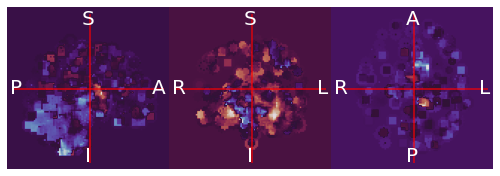

-0.014154168013671696


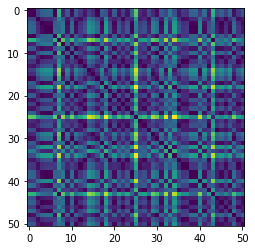

In [5]:
#correlation between diffmat of subject and gene
diffmats = np.load('../../Data/Genemaps/CVAE_diffmats_S661.npy')
subject_diffmat = diffmats[0,:,:]
atlas = ants.image_read('../../YeoAtlas/Atlas_parc-7n_2mm.nii')
gene_im = ants.image_read('../../Data/Genemaps/gene_22585_NLGN4Y_22829.0.nii.gz')
gene_im.plot_ortho(flat=True,cmap='twilight')
gene_flat = gene_im.numpy().flatten()
atlas_flat = atlas.numpy().flatten()
roi_expression = np.array([gene_flat[atlas_flat==roi].mean() for roi in np.arange(1,52)])
gene_sim = np.zeros((51,51))
for i in range(51):
    for j in range(51):
        gene_sim[i,j] = abs(roi_expression[i]-roi_expression[j])
plt.imshow(gene_sim)
triu = np.triu_indices(51,k=1)
gene_vec = gene_sim[triu]
fmri_vec = subject_diffmat[triu]
data = np.corrcoef(gene_vec,fmri_vec)[0,1]
print(data)

/data/pijarj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Text(0.5, 0, 'Correlation Coefficient')

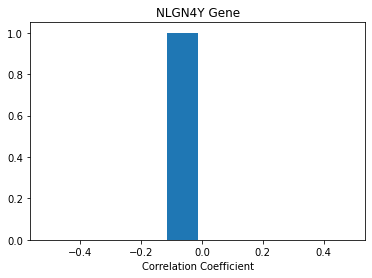

In [6]:
#histogram
plt.hist(data)
plt.title('NLGN4Y Gene')
plt.xlabel('Correlation Coefficient')

Text(0.5, 1.0, 'NLGN4Y Gene')

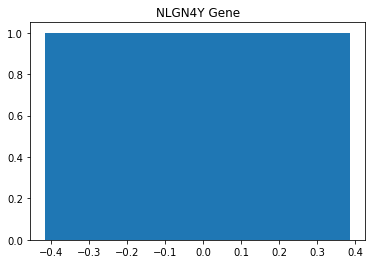

In [7]:
#bar graph
plt.bar(data,height=1)
plt.title('NLGN4Y Gene')